# udacity nanodegree - data science blog post

### load necessary libraries and data

In [984]:
import tensorflow as tf
import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
import time
import datetime
sns.set()
# magic word for producing visualizations in notebook
%matplotlib inline

fileToRead_1=('C:/Dokumente/10_Innovation_Hub/30_Kurs/Blog/data/survey_results_public.csv')
df=pd.read_csv(fileToRead_1)
results_public=df

fileToRead_2=('C:/Dokumente/10_Innovation_Hub/30_Kurs/Blog/data/survey_results_schema.csv')
results_schema=pd.read_csv(fileToRead_2)

# Business understanding
The data is from a survey, that Stack overflow conducted. 
Developers from all over the world participated in the survey

### The question I want to answer are
- Are people who program in their free time more satisfied in their job?
- Do developers who program also as a hobby make more money?
- Will this additional training and expertise pay off in the long run?

For my detailed insides on the topic pleas read my blog post: https://medium.com/@peter.huesson/will-making-your-hobby-to-your-job-make-you-rich-ec9cdeba979

# Data understanding

Let's examine the data from the survey to get a better understanding

In [985]:
results_public.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [986]:
results_public.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [987]:
results_public.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [988]:
results_public.shape

(88883, 85)

C:\Users\q477847\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


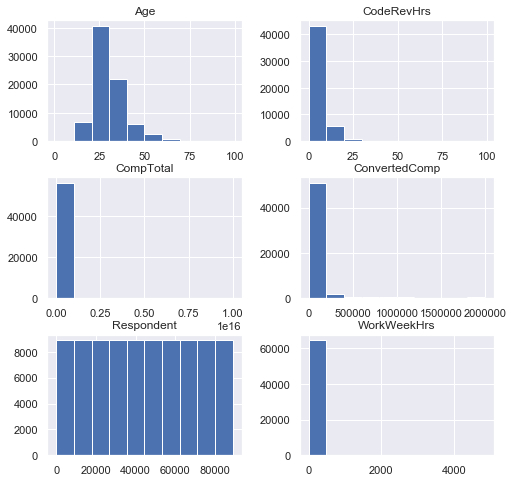

In [989]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
results_public.hist(ax = ax);

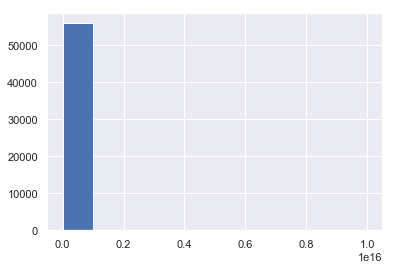

In [990]:
results_public['CompTotal'].hist()

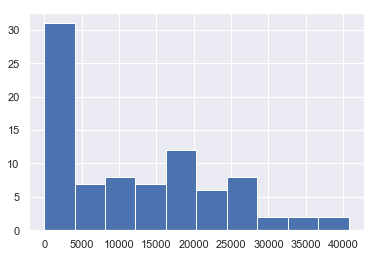

In [991]:
results_public.isna().sum().hist()

In [992]:
results_public['JobSat'].isnull().mean()

0.2013320882508466

# Data preparation

I drop all rows for missing job satisfaction. Imputing values does not make sense for me here.

In [993]:
results_public = results_public.dropna(subset=['JobSat'], how='any')

In [994]:
results_public['JobSat'].isnull().mean()

0.0

In [995]:
JobSat_categories=results_public['JobSat'].unique().tolist()
JobSat_categories

['Slightly satisfied',
 'Slightly dissatisfied',
 'Neither satisfied nor dissatisfied',
 'Very satisfied',
 'Very dissatisfied']

In [996]:
results_public['JobSat_val']=results_public['JobSat']
results_public['JobSat_val'].replace(['Slightly satisfied','Slightly dissatisfied','Neither satisfied nor dissatisfied','Very satisfied', 'Very dissatisfied'], [4, 2, 3, 5, 1], inplace=True)
results_public[['JobSat', 'JobSat_val']].head(15)

C:\Users\q477847\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\q477847\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,JobSat,JobSat_val
2,Slightly satisfied,4
3,Slightly satisfied,4
4,Slightly dissatisfied,2
5,Slightly satisfied,4
6,Neither satisfied nor dissatisfied,3
8,Slightly satisfied,4
9,Slightly dissatisfied,2
12,Very satisfied,5
13,Very satisfied,5
15,Slightly satisfied,4


In [997]:
results_public['Hobbyist_val']=results_public['Hobbyist']
results_public['Hobbyist_val'].replace(['Yes', 'No'], [1, 0], inplace=True)
results_public[['Hobbyist', 'Hobbyist_val']].head(15)

C:\Users\q477847\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Hobbyist,Hobbyist_val
2,Yes,1
3,No,0
4,Yes,1
5,Yes,1
6,No,0
8,Yes,1
9,Yes,1
12,Yes,1
13,Yes,1
15,Yes,1


In [998]:
results_public['Hobbyist_val'].isnull().mean()

0.0

In [999]:
results_public['Hobbyist_val'].mean()

0.7894291993012904

Wow. 80% of participants code in their free time.

In [1000]:
res=results_public.groupby(['JobSat_val']).mean()['Hobbyist_val']
res

JobSat_val
1    0.773729
2    0.781994
3    0.776032
4    0.787376
5    0.803804
Name: Hobbyist_val, dtype: float64

## Data preparation
Splitting the dataset into Hobbyists and no Hobbyists

In [1001]:
results_public_hobbyist=results_public[results_public['Hobbyist_val']==1]
results_public_no_hobbyist=results_public[results_public['Hobbyist_val']==0]
results_public_no_hobbyist.shape

(14948, 87)

In [1002]:
res_hob=results_public_hobbyist['JobSat_val'].value_counts()
res_no_hob=results_public_no_hobbyist['JobSat_val'].value_counts()
res_hob

4    19060
5    18047
2     8408
3     6767
1     3758
Name: JobSat_val, dtype: int64

In [1003]:
res_no_hob_pro.sort_index()

1    0.073522
2    0.156810
3    0.130653
4    0.344327
5    0.294688
Name: JobSat_val, dtype: float64

In [1004]:
results_public_no_hobbyist.shape

(14948, 87)

In [1005]:
res_hob_pro = res_hob/results_public_hobbyist.shape[0]
res_hob_pro = res_hob_pro.sort_index()
res_hob_pro

1    0.067059
2    0.150036
3    0.120753
4    0.340114
5    0.322038
Name: JobSat_val, dtype: float64

In [1006]:
res_no_hob_pro = res_no_hob/results_public_no_hobbyist.shape[0]
res_no_hob_pro = res_no_hob_pro.sort_index()
res_no_hob_pro

1    0.073522
2    0.156810
3    0.130653
4    0.344327
5    0.294688
Name: JobSat_val, dtype: float64

In [1007]:
res_hob_pro.values.sum()

1.0

# Visualization of my first question

- Are people who program in their free time more satisfied in their job?

## Evaluate the Results:
Seems they are. At least on the very satisfied category

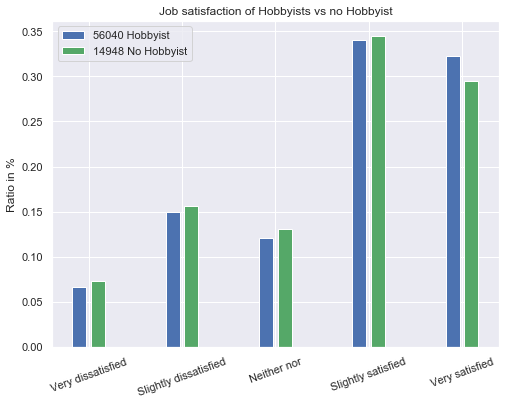

In [1008]:
# plot the answer to my fist question
Legende_Hobby = [str(int(results_public_hobbyist.shape[0]))+' Hobbyist',str(int(results_public_no_hobbyist.shape[0]))+' No Hobbyist']
y1 = res_hob_pro.values
y2 = res_no_hob_pro.values
Sat_Labels = ['Very dissatisfied','Slightly dissatisfied','Neither nor','Slightly satisfied','Very satisfied']

ind = np.arange(5)  # the x locations for the groups
width = 0.1 

fig = plt.figure(figsize=(8, 6)) 

ax = plt.subplot()
ax.bar(ind-width, y1, width=0.15, color='b', align='center')
ax.bar(ind+width, y2, width=0.15, color='g', align='center')
ax.set_ylabel("Ratio in %")
ax.set_title('Job satisfaction of Hobbyists vs no Hobbyist')
plt.xticks(ind, Sat_Labels, rotation=20)
plt.legend(Legende_Hobby,loc=0)
plt.savefig("Job satisfaction of Hobbyists vs no Hobbyist.png")

# Data preparation #2

I am currently not sure about the conversion of the salaries. To minimize the error I only use the US 
salaries for my future analysis.
I am using the "fresh" dataset df.

In [1009]:
# using the "fresh" dataset. All rows are included. No rows deleted yet.
salary_df=df

In [1010]:
salary_df[['CompTotal', 'CompFreq', 'ConvertedComp']].head()

,CompTotal,CompFreq,ConvertedComp
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,23000.0,Monthly,8820.0
3,61000.0,Yearly,61000.0
4,NaN,NaN,NaN


In [1011]:
salary_df['Country'].head()

0            United Kingdom
1    Bosnia and Herzegovina
2                  Thailand
3             United States
4                   Ukraine
Name: Country, dtype: object

## Data preparation

only using survey results from the US. So we avoid currancy and exchange rate issues.

In [1012]:
results_public_US=df[df['Country'] == 'United States']

In [1013]:
results_public_US=results_public_US.sort_values(['CompTotal'], ascending=[False])
results_public_US[['CompTotal', 'CompFreq', 'ConvertedComp']].head(10)

,CompTotal,CompFreq,ConvertedComp
37922,1.000000e+16,Weekly,2000000.0
23795,1.000000e+16,Monthly,2000000.0
41107,1.000000e+09,Weekly,2000000.0
11799,1.000000e+09,Yearly,2000000.0
27704,1.000000e+08,Yearly,2000000.0
40474,5.000000e+07,Monthly,25860.0
40434,1.300000e+07,Yearly,2000000.0
82792,1.250000e+07,Yearly,1000000.0
6387,1.200000e+07,Monthly,3420.0
82757,9.099999e+06,Weekly,1000000.0


In [1014]:
results_public_US['ConvertedComp'].isnull().mean()

0.28488233328559837

In [1015]:
results_public_US['ConvertedComp'].max()

2000000.0

The highest value for ConvertedComp seems to be too high for me.
So I decide not to impute values for the missing ConvertedComp. 
Instead I drop the rows

In [1016]:
results_public_US = results_public_US.dropna(subset=['ConvertedComp'], how='any')

In [1017]:
results_public_US['CompTotal'].max()
#yeah, no...

1e+16

C:\Users\q477847\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


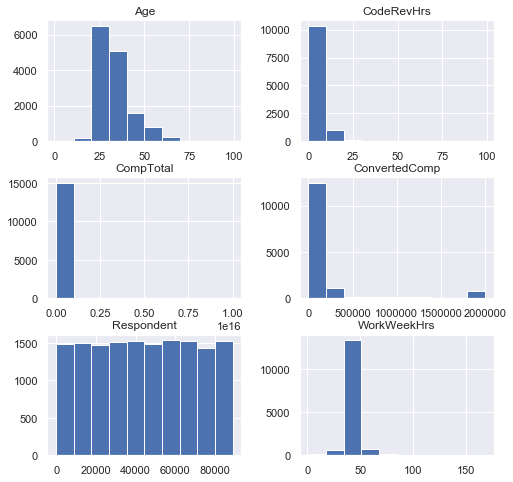

In [1018]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
results_public_US.hist(ax = ax);

In [1019]:
results_public_US.shape

(14981, 85)

In [1020]:
results_public_US['ConvertedComp'].isnull().mean()

0.0

## Visualization

Let's get a better understanding of the ConvertedComp

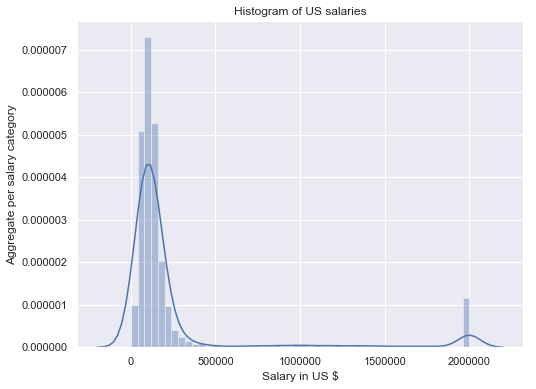

In [1021]:
fig = plt.figure(figsize=(8, 6)) 
sns.distplot(results_public_US['ConvertedComp'])
plt.title('Histogram of US salaries')
plt.ylabel('Aggregate per salary category')
plt.xlabel('Salary in US $')
plt.savefig("Histogram of US salaries.png")

## Data cleaning

The histogramm does not make a lot of sense. There are clear outliers on the higher spectrum.
Overall, I want to have a look ony at the salaries up to 250k$. Since higher salaries seem not to be real/reliable.

In [1022]:
results_public_US=results_public_US[results_public_US['ConvertedComp'] < 250000]

## Visualization

Let's check ConvertedComp gain. Looks better and more "real" to me.

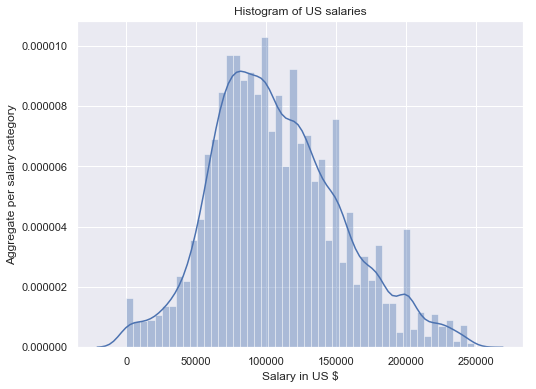

In [1023]:
fig = plt.figure(figsize=(8, 6)) 
sns.distplot(results_public_US['ConvertedComp'])
plt.title('Histogram of US salaries')
plt.ylabel('Aggregate per salary category')
plt.xlabel('Salary in US $')
plt.savefig("Histogram of US salaries.png")

In [1024]:
results_public_US['ConvertedComp'].head()

40474     25860.0
6387       3420.0
84354     10075.0
36591    248400.0
43826    248000.0
Name: ConvertedComp, dtype: float64

## Data preparation

Here I want to segment teh age of the participants into salary ranges

In [1025]:
def f(row):
    """Function to seperate values into different ranges. Function takes each row and segments the value into the acording range. Returns range value"""
    if row['ConvertedComp'] <= 50000:
        val = '0-50k'
    elif row['ConvertedComp'] <= 100000:
        val = '50-100k'
    elif row['ConvertedComp'] <= 150000:
        val = '100-150k'
    elif row['ConvertedComp'] <= 200000:
        val = '150-200k'
    else:
        val = '200-250k'
    return val

In [1026]:
results_public_US['comp_range'] = results_public_US.apply(f, axis=1)

In [1027]:
results_public_US[['comp_range', 'ConvertedComp']].head()

,comp_range,ConvertedComp
40474,0-50k,25860.0
6387,0-50k,3420.0
84354,0-50k,10075.0
36591,200-250k,248400.0
43826,200-250k,248000.0


In [1028]:
results_public_US_hobbyist=results_public_US[results_public_US['Hobbyist']=="Yes"]
results_public_US_no_hobbyist=results_public_US[results_public_US['Hobbyist']=="No"]
results_public_US_no_hobbyist.shape

(2772, 86)

In [1029]:
sal_hob=results_public_US_hobbyist['comp_range'].value_counts()
sal_no_hob=results_public_US_no_hobbyist['comp_range'].value_counts()
sal_no_hob

50-100k     1198
100-150k     962
150-200k     346
0-50k        188
200-250k      78
Name: comp_range, dtype: int64

In [1030]:
sal_no_hob = sal_no_hob.reindex(index = ['0-50k','50-100k','100-150k','150-200k','200-250k'])
sal_hob = sal_hob.reindex(index = ['0-50k','50-100k','100-150k','150-200k','200-250k'])

sal_no_hob

0-50k        188
50-100k     1198
100-150k     962
150-200k     346
200-250k      78
Name: comp_range, dtype: int64

In [1031]:
sal_hob.sort_index()
sal_hob

0-50k        886
50-100k     4199
100-150k    3531
150-200k    1359
200-250k     323
Name: comp_range, dtype: int64

In [1032]:
sal_hob_prob = sal_hob/results_public_US_hobbyist.shape[0]
sal_no_hob_prob = sal_no_hob/results_public_US_no_hobbyist.shape[0]
len(sal_no_hob_prob)

5

In [1033]:
len(sal_hob_prob)

5

# Visualization of my second question

- Do developers who program also as a hobby make more money?

## Evaluate the Results:
Not quite sure. The higher range seems to be like it.

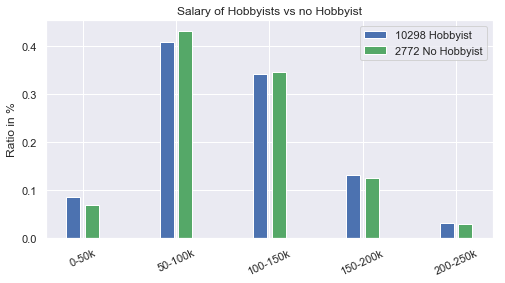

In [1034]:
Legende_Hobby = [str(int(results_public_US_hobbyist.shape[0]))+' Hobbyist',str(int(results_public_US_no_hobbyist.shape[0]))+' No Hobbyist']
y1 = sal_hob_prob.values
y2 = sal_no_hob_prob.values
Sat_Labels = sal_no_hob_prob.index

ind = np.arange(int(len(sal_hob_prob)))  # the x locations for the groups
width = 0.1 

fig = plt.figure(figsize=(8, 4)) 

ax = plt.subplot()
ax.bar(ind-width, y1, width=0.15, color='b', align='center')
ax.bar(ind+width, y2, width=0.15, color='g', align='center')
ax.set_ylabel("Ratio in %")
ax.set_title('Salary of Hobbyists vs no Hobbyist')
plt.xticks(ind, Sat_Labels, rotation=25)
plt.legend(Legende_Hobby,loc=0)
plt.savefig("Salary of Hobbyists vs no Hobbyist.png")

In [1035]:
new_df=results_public_US

In [1036]:
new_df['Age'].unique()

array([31. , 29. , 27. , 40. , 62. , 35. , 53. , 54. , 37. , 26. , 28. ,
       38. , 51. , 41. , 32. , 42. , 52. , 45. ,  nan, 30. , 36. , 48. ,
       44. , 50. , 58. , 59. , 46. , 33. , 39. , 43. , 23. , 22. , 56. ,
       49. , 61. , 25. , 24. , 34. , 55. , 21. , 57. , 20. , 65. , 47. ,
       63. , 60. , 71. , 64. , 66. , 67. , 18. , 69. , 19. , 72. , 68. ,
       37.5, 16. , 99. , 74. , 70. , 15. ,  2. , 24.5, 26.5, 61.3, 17. ,
       31.5,  1. ])

## Data preparation
Here I want to segment teh age of teh participants into age groups

In [1037]:
# create age ranges
def f(row):
    """Function to seperate values into different ranges. Function takes each row and segments the value into the acording range. Returns range value"""
    if row['Age'] <= 25:
        val = '0-25y'
    elif row['Age'] <= 35:
        val = '25-35y'
    elif row['Age'] <= 45:
        val = '35-45y'
    elif row['Age'] <= 55:
        val = '45-55y'
    elif row['Age'] <= 65:
        val = '55-65y'
    else:
        val = 'over 65y'
    return val

In [1038]:
results_public_US['Age-group'] = results_public_US.apply(f, axis=1)

# Visualization of my third question

- Will this additional training and expertise pay off in the long run?

## Evaluate the Results:
Between 35-65 years. Yes.

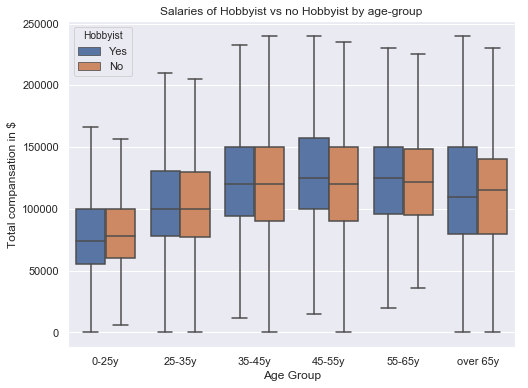

In [1039]:
fig = plt.figure(figsize=(8, 6)) 
sns_plot = sns.boxplot(x=new_df["Age-group"], y=new_df["ConvertedComp"], hue="Hobbyist", data=new_df, showfliers = False, order=['0-25y','25-35y','35-45y','45-55y','55-65y','over 65y'])
sns_plot.set_title('Salaries of Hobbyist vs no Hobbyist by age-group')
plt.ylabel('Total compansation in $')
plt.xlabel('Age Group')
plt.savefig("Salaries of Hobbyist vs no Hobbyist by age-group.png")

My detailed analysis here: https://medium.com/@peter.huesson/will-making-your-hobby-to-your-job-make-you-rich-ec9cdeba979